In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#how much run will virat score in today match (taking mean) 
data=pd.read_csv('Transformed_Housing_Data2.csv')
data['mean_sale']=data['Sale_Price'].mean()
data['mean_sale'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sale, dtype: float64

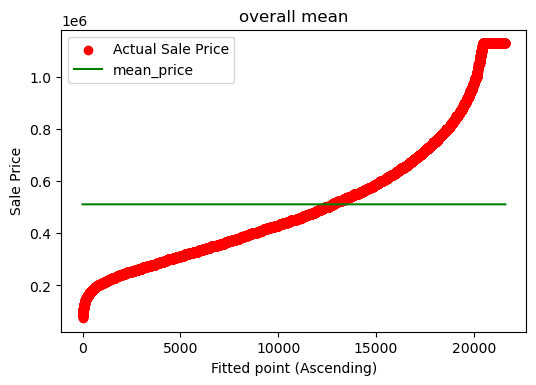

In [31]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,data['mean_sale'].sort_values(),color='green',label='mean_price')
plt.xlabel('Fitted point (Ascending)')
plt.ylabel('Sale Price')
plt.title('overall mean')
plt.legend()

In [32]:
# rather than taking overall avg it was preffered to take avg acc to grade it will give more accurate result
grades_mean=data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

#gives 2 grade as highest increase**********************

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [33]:
#storing grade mean into data['grade_mean']
data['grade_mean']=0
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]
data['grade_mean'].head()

C:\Users\VINAY RAJ DHADDHA\AppData\Local\Temp\ipykernel_14312\3218349292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

# Residual plot 

In [34]:
mean_difference=data['mean_sale']-data['Sale_Price']
grade_mean_difference=data['grade_mean']-data['Sale_Price']

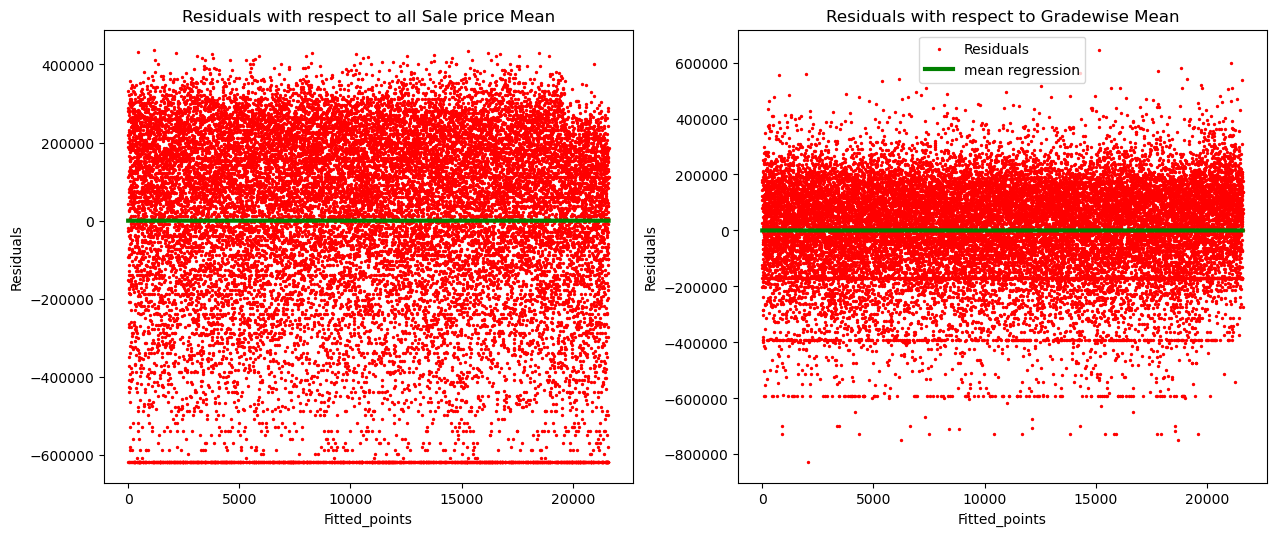

In [35]:
k=range(0,len(data))
l=[0 for i in range(len(data))]
plt.figure(figsize=(15,6),dpi=100)


plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean regression',linewidth=3)
plt.xlabel('Fitted_points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to all Sale price Mean')

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean regression',linewidth=3)
plt.xlabel('Fitted_points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to Gradewise Mean')

plt.legend()

In [36]:
Y=data['Sale_Price']
Y_hat1=data['mean_sale']   #predicted overall mean
Y_hat2=data['grade_mean']  #predicted gradewise mean
n=len(data)
len(Y),len(Y_hat1),len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [37]:
# mean error 
cost=sum(mean_difference)/len(data)
round(cost,7)   # o/p 0 always  

0.0

In [38]:
# Mean Absolute Error
cost_mean=sum(abs(Y_hat1-Y))/n
cost_grade_mean=sum(abs(Y_hat2-Y))/n
cost_mean,cost_grade_mean

(199168.78146839526, 137081.70298203363)

In [39]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
cost_grade_mean=mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

In [40]:
# Mean Square Error
from sklearn.metrics import mean_squared_error as mse
cost_mean=mse(Y_hat1,Y)
cost_grade_mean=mse(Y_hat2,Y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

# R^2
It gives us the relative error of a regression model with respect to the simple mean regression model.

In [41]:
R2= 1-(cost_grade_mean/cost_mean)  # higher the value of r^2 better the model
R2

0.5073442592981836

In [42]:
# Making the regression model for sale_price based on flat_area
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data= pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


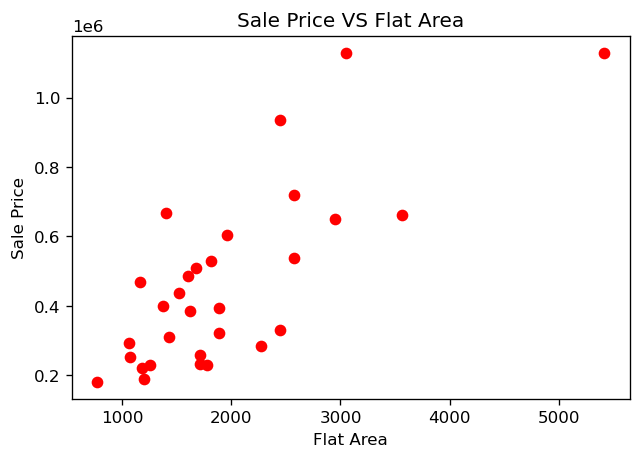

In [43]:
plt.figure(dpi=120)
plt.scatter(sample_data.flat_area, sample_data.sale_price,color='red')
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title('Sale Price VS Flat Area')
plt.show()

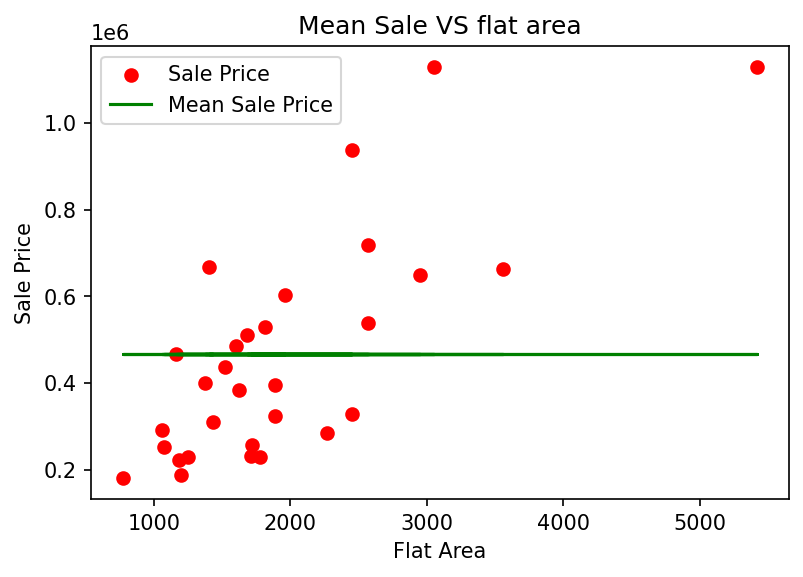

In [44]:
# Making Mean sale Price model

sample_data['mean_sale_price'] = sample_data.sale_price.mean()
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price,color='red',label='Sale Price')
plt.plot(sample_data.flat_area,sample_data.mean_sale_price,color='green',label="Mean Sale Price")
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Mean Sale VS flat area')
plt.legend()
plt.show()

# Parameter of Linear Regression Model

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

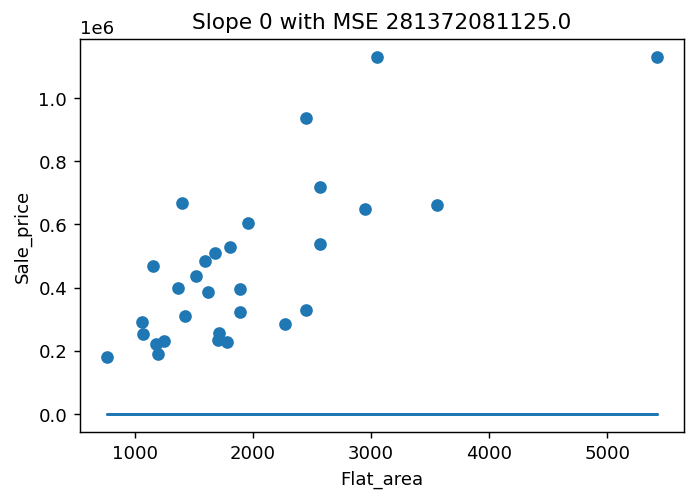

In [45]:
c=0
m=0
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)
plt.figure(dpi=130)
plt.plot(sample_data['flat_area'],line,label='m=0;c=0')
plt.scatter(sample_data['flat_area'],sample_data['sale_price'])
plt.xlabel('Flat_area')
plt.ylabel('Sale_price')
MSE=mse(sample_data['sale_price'],line)
plt.title('Slope ' +str(m)+' with MSE '+ str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

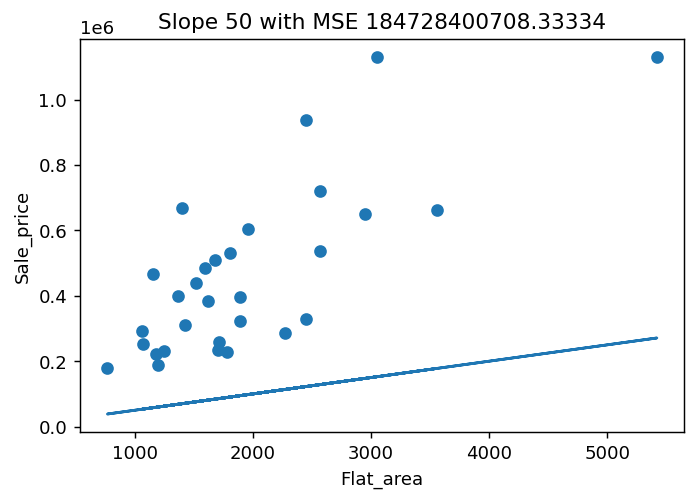

In [46]:
c=0
m=50
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)
plt.figure(dpi=130)
plt.plot(sample_data['flat_area'],line,label='m=50;c=0')
plt.scatter(sample_data['flat_area'],sample_data['sale_price'])
plt.xlabel('Flat_area')
plt.ylabel('Sale_price')
MSE=mse(sample_data['sale_price'],line)
plt.title('Slope ' +str(m)+' with MSE '+ str(MSE))

# Automating the Hit & Trail way of selecting slope

In [47]:
def slope_Error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp=sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
    MSE=mse(sample_data.sale_price,sale)
    return MSE


In [48]:
slope=[i/10 for i in range(0,5000)]
Cost=[]
for i in slope:
    cost=slope_Error(slope=i,intercept=0,sample_data=sample_data)
    Cost.append(cost)

In [49]:
#arrange in dataframe
Cost_table=pd.DataFrame({
    'slope':slope ,
    'Cost':Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


# Cost Function Curve

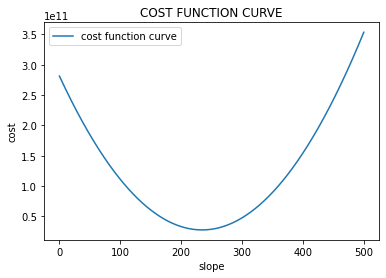

In [50]:
#plotting the cost values corrrsponding to every value 
plt.plot(Cost_table['slope'],Cost_table['Cost'],label= 'cost function curve')
plt.xlabel('slope')
plt.ylabel('cost')
plt.title('COST FUNCTION CURVE')
plt.legend()

In [61]:
#getting the slope at global minima is not sufficent as now we have also have to find intercept value same as we find slope
intercept=[i for i in range(5000,50000)]
Cost=[]
for i in intercept:
    cost=slope_Error(slope=234,intercept=i,sample_data=sample_data)# prev defined fnx now with varialbe intercept 
    Cost.append(cost)

In [62]:
#arrange in dataframe
Cost_table=pd.DataFrame({
    'intercept':intercept ,
    'Cost':Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


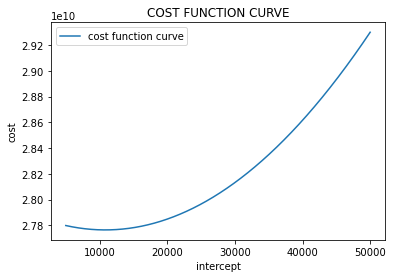

In [63]:
#plotting the cost values corrrsponding to every value of beta
plt.plot(Cost_table['intercept'],Cost_table['Cost'],label= 'cost function curve')
plt.xlabel('intercept')
plt.ylabel('cost')
plt.title('COST FUNCTION CURVE')
plt.legend()

From the value of intercept at min cost we get different value of slope 
> The optimum value of slope would depend on the value of intercept and vice versa

>Now repeat the same procedure till we get m=219 and c=39428
>hence equation for the best fit line or best regression line model is

>Y= 219X + 39428

# Gradient Descent

In [64]:
def param_init(Y):
    m=0.1
    c=Y.mean()
    return m,c


In [65]:
def generate_predictions(m,c,X):
    prediction=[]
    for x in X:
        pred=(m*x)+c
        prediction.append(pred)
    return prediction

In [66]:
def compute_cost(prediction,Y):
    cost=np.sum(((prediction-Y)**2)/len(Y))
    return cost

In [67]:
def gradients(prediction,Y,X):
    n=len(Y)
    Gm=2/n*np.sum((prediction-Y)*X)
    Gc=2/n*np.sum((prediction-Y))
    return Gm,Gc

In [68]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
    m_new = m_old-alpha*Gm_old
    c_new = c_old-alpha*Gc_old
    return m_new,c_new

In [69]:
def result(m,c,X,Y,cost,prediction,i):
    if i< max_iter-1:
        print('** Gradient Descent has converged at iterator{}**'.format(i))
    else:
        print('**Result after ',max_iter, 'iterator is:**')
    #plotting the final result
    plt.figure(figsize=(14,7),dpi=120)
    plt.scatter(X,Y,color='red',label='data points')
    label='Final regression line: m={}; c={}'.format(str(m),str(c))
    plt.plot(X,prediction,color='green',label=label)
    plt.xlabel('flat area')
    plt.ylabel('sale price')
    plt.title('Final regression line')
    plt.legend()
    
    

After iteration  0 m = 0.11316346413633305 ; c= 1.1849780416165836e-16 ; Cost= 0.85836535863667
After iteration  20 m = 0.3275595607435688 ; c= 1.240489192847842e-16 ; Cost= 0.6182472245590185
After iteration  40 m = 0.4706921039517346 ; c= 1.3248661427193537e-16 ; Cost= 0.5112264752046607
After iteration  60 m = 0.5662485308150865 ; c= 1.415904430738617e-16 ; Cost= 0.46352728398628984
After iteration  80 m = 0.6300427631414932 ; c= 1.4951003398285442e-16 ; Cost= 0.4422677351921283
After iteration  100 m = 0.6726323011945988 ; c= 1.611303683072644e-16 ; Cost= 0.4327923457067555
After iteration  120 m = 0.7010654163122192 ; c= 1.666074685620818e-16 ; Cost= 0.42856916078553225
After iteration  140 m = 0.7200475906265729 ; c= 1.6660746856208182e-16 ; Cost= 0.4266868855601835
After iteration  160 m = 0.7327202415200801 ; c= 1.669405354694694e-16 ; Cost= 0.42584795473189874
After iteration  180 m = 0.7411806042798547 ; c= 1.6694053546946945e-16 ; Cost= 0.42547404292284524
After iteration  2

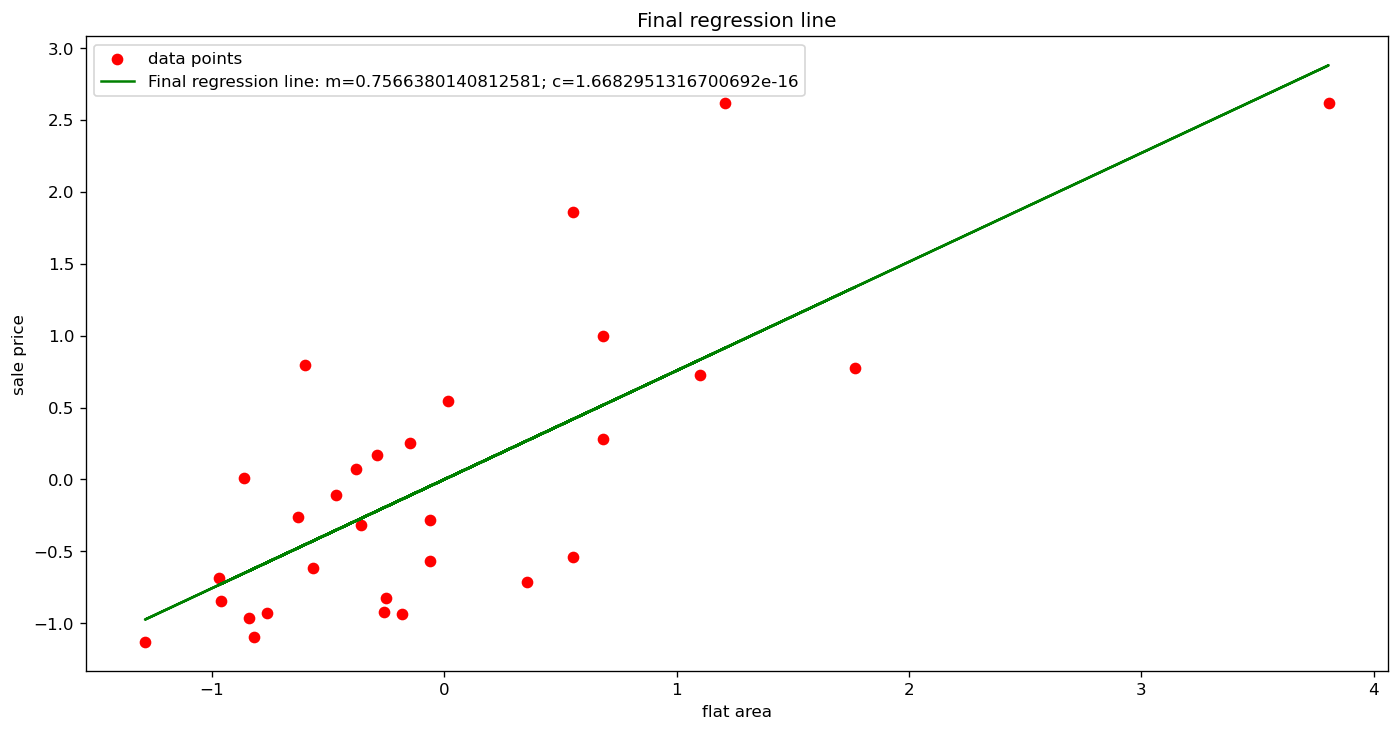

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))


max_iter=1000
cost_old=0
alpha=0.01

m,c=param_init(sale_price)

for i in range(0,max_iter):
    predictions = generate_predictions(m,c,flat_area)
    cost_new = compute_cost(predictions,sale_price)
    
    if(abs(cost_new-cost_old)<10**(-7)):
        break
    
    Gm,Gc=gradients(predictions,sale_price,flat_area)
    
    m,c = param_update(m,c,Gm,Gc,alpha)
    
    if i%20==0:
        print('After iteration ',i,'m =',m,'; c=', c,'; Cost=', cost_new)
        
    cost_old = cost_new
    
result(m,c, flat_area, sale_price, cost_new , predictions , i)